## Back propagation com numpy
#### Autor: Leonardo de Holanda Bonifácio

In [1]:
import numpy as np

Entrada e portas lógicas para treinamento

In [2]:
entrada = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])

target_AND = np.array([[0.0],
                       [0.0],
                       [0.0],
                       [1.0]])

target_OR = np.array([[0.0],
                      [1.0],
                      [1.0],
                      [1.0]])

target_XOR = np.array([[0.0],
                       [1.0],
                       [1.0],
                       [0.0]])

In [3]:
# Função generalizada para perceptron multi-camadas
def inicializarPesos(tamanho_entrada, tamanho_oculta):
    pesos0 = np.random.random((tamanho_oculta ,tamanho_entrada)) 
    pesos1 = np.random.random((tamanho_entrada,1)) 
    
    return pesos0, pesos1

In [4]:
pesos0, pesos1 = inicializarPesos(4,2)

print(pesos0)
print()
print(pesos1)

[[0.27567811 0.25365615 0.18174187 0.28387344]
 [0.78372748 0.82310875 0.41869097 0.28060321]]

[[0.2513368 ]
 [0.53597916]
 [0.1461016 ]
 [0.38406282]]


In [5]:
# Caso o usuário queira uma valor aleatório para o bias
def inicializadorBias():
    bias = np.random.random()
    
    return bias

In [6]:
inicializadorBias()

0.17307321482856397

In [7]:
# Função para cálculo de erro
def erro(target, saida):
    return target - saida

In [8]:
# Função sigmoid. Se derivada == True, retorna a derivada da função
def sigmoid(x, derivada=False):
	if not derivada:
		return 1 / (1 + np.exp (-x))
	else:
		out = sigmoid(x)
		return out * (1 - out)

### Método e testes

In [9]:
def treinamento(entrada, target, epocas, learning_rate, verbose = False):
    pesos0, pesos1 = inicializarPesos(4,2)
    bias = 1 # Melhor valor verificado para a aplicação
    custo_val = []
    
    for j in range(epocas+1):
        # Sentido Foward
        layer0 = entrada # Entrada
        layer1 = sigmoid(np.dot(layer0, pesos0) + bias) # Oculta 
        layer2 = sigmoid(np.dot(layer1, pesos1) + bias) # Saída
        
        # Sentido Backward
        layer2_error = erro(target, layer2)
        layer2_delta = layer2_error*sigmoid(layer2, derivada=True)

        layer1_error = layer2_delta.dot(pesos1.T)    
        layer1_delta= layer1_error * sigmoid(layer1,derivada=True)
        
        # Atualização de pesos
        pesos1 += layer1.T.dot(layer2_delta) * learning_rate
        pesos0 += layer0.T.dot(layer1_delta) * learning_rate        
        
        erro_meansum = np.mean(np.abs(layer2_error))
        erro_meansum_str = str(round(np.mean(np.abs(layer2_error)),4))
                               
        custo_val.append(erro_meansum)
        
        if (j% n_display) == 0: # Printa a cada n_display repetições
            print ("Erro (Mean Sum) na iteração", j,':', erro_meansum_str)
            if(verbose == True): # Caso queira visualizar a camada de saída
                print("Saída:")
                print(layer2)
                print()
                
    return custo_val

#### Testes

In [10]:
epocas = 10000
n_display = epocas/ 10 
l_rate = 0.7

In [11]:
# Execução para porta AND
custo_AND = treinamento(entrada, target_AND, epocas, l_rate, verbose = True)

Erro (Mean Sum) na iteração 0 : 0.686
Saída:
[[0.87113018]
 [0.87628627]
 [0.88140003]
 [0.88488261]]

Erro (Mean Sum) na iteração 1000 : 0.1972
Saída:
[[1.24577052e-10]
 [2.52852301e-01]
 [2.52891770e-01]
 [7.16826496e-01]]

Erro (Mean Sum) na iteração 2000 : 0.1936
Saída:
[[5.07419010e-15]
 [2.48244921e-01]
 [2.48252052e-01]
 [7.22041837e-01]]

Erro (Mean Sum) na iteração 3000 : 0.1922
Saída:
[[2.09774750e-18]
 [2.46351858e-01]
 [2.46352871e-01]
 [7.24035543e-01]]

Erro (Mean Sum) na iteração 4000 : 0.1913
Saída:
[[2.72221470e-21]
 [2.45261893e-01]
 [2.45261291e-01]
 [7.25157780e-01]]

Erro (Mean Sum) na iteração 5000 : 0.1908
Saída:
[[7.26840715e-24]
 [2.44534525e-01]
 [2.44533494e-01]
 [7.25898565e-01]]

Erro (Mean Sum) na iteração 6000 : 0.1904
Saída:
[[3.23609513e-26]
 [2.44006894e-01]
 [2.44005820e-01]
 [7.26432577e-01]]

Erro (Mean Sum) na iteração 7000 : 0.1901
Saída:
[[2.12473722e-28]
 [2.43602986e-01]
 [2.43602008e-01]
 [7.26839754e-01]]

Erro (Mean Sum) na iteração 8000 : 0

In [12]:
# Execução para porta OR
custo_OR = treinamento(entrada, target_OR, epocas, l_rate)

Erro (Mean Sum) na iteração 0 : 0.2846
Erro (Mean Sum) na iteração 1000 : 0.0064
Erro (Mean Sum) na iteração 2000 : 0.0028
Erro (Mean Sum) na iteração 3000 : 0.0018
Erro (Mean Sum) na iteração 4000 : 0.0013
Erro (Mean Sum) na iteração 5000 : 0.0011
Erro (Mean Sum) na iteração 6000 : 0.0009
Erro (Mean Sum) na iteração 7000 : 0.0008
Erro (Mean Sum) na iteração 8000 : 0.0007
Erro (Mean Sum) na iteração 9000 : 0.0006
Erro (Mean Sum) na iteração 10000 : 0.0005


In [13]:
# Execução para porta XOR
custo_XOR = treinamento(entrada, target_XOR, epocas, l_rate)

Erro (Mean Sum) na iteração 0 : 0.4986
Erro (Mean Sum) na iteração 1000 : 0.4366
Erro (Mean Sum) na iteração 2000 : 0.0724
Erro (Mean Sum) na iteração 3000 : 0.0477
Erro (Mean Sum) na iteração 4000 : 0.0398
Erro (Mean Sum) na iteração 5000 : 0.0347
Erro (Mean Sum) na iteração 6000 : 0.0283
Erro (Mean Sum) na iteração 7000 : 0.0224
Erro (Mean Sum) na iteração 8000 : 0.0179
Erro (Mean Sum) na iteração 9000 : 0.0146
Erro (Mean Sum) na iteração 10000 : 0.0122


### Visualização gráfica da queda da função de custo

Text(0.5, 1.0, 'Descida da função de custo')

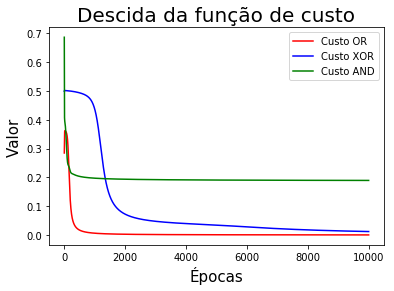

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(custo_OR, label = 'Custo OR', color = 'red')
plt.plot(custo_XOR, label = 'Custo XOR', color = 'blue')
plt.plot(custo_AND, label = 'Custo AND', color = 'green')
plt.legend()
plt.xlabel('Épocas', size = 15)
plt.ylabel('Valor', size = 15)
plt.title('Descida da função de custo', size = 20)